# iModulon activity changes

Utility notebook to load the A matrices for E. coli and P. putida and visualize individual iModulon activity across conditions.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from pathlib import Path
from matplotlib import font_manager
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['font.family'] = 'Arial'

font_path = "/usr/share/fonts/truetype/msttcorefonts/Arial.ttf"
font_manager.fontManager.addfont(font_path)
# font_prop = font_manager.FontProperties(fname=font_path)
font_prop = font_manager.FontProperties(family='Arial')

data_dir = Path('A_Matrices')
ecoli_A = pd.read_csv(data_dir / 'E_coli_A.csv', index_col=0)
pputida_A = pd.read_csv(data_dir / 'P_putida_A.csv', index_col=0)

print(f"Loaded E. coli A matrix: {ecoli_A.shape[0]} iModulons x {ecoli_A.shape[1]} conditions")
print(f"Loaded P. putida A matrix: {pputida_A.shape[0]} iModulons x {pputida_A.shape[1]} conditions")


Loaded E. coli A matrix: 201 iModulons x 48 conditions
Loaded P. putida A matrix: 84 iModulons x 48 conditions


In [2]:
SECTION_ORDER = ['1000:1', '1:1', '1:1000']
MONO_LABEL = {'E_coli': 'E_coli', 'P_putida': 'P_putida'}
TIMEPOINTS = ['0h', '4h', '8h', '24h']
SECTION_COLORS = {
    '1000:1': '#9367ac',
    '1:1': '#f2b340',
    '1:1000': '#94c47d',
    'E_coli': '#6f8ec9',
    'P_putida': '#6f8ec9',
}

BAR_WIDTH = 0.65
BAR_GAP = (1 - BAR_WIDTH) / 3  # reduce gap to one-third of previous spacing
STEP_SIZE = BAR_WIDTH + BAR_GAP


In [3]:
pputida_A

,1000:1_0h_1,1000:1_0h_2,1000:1_0h_3,1000:1_24h_1,1000:1_24h_2,1000:1_24h_3,1000:1_4h_1,1000:1_4h_2,1000:1_4h_3,1000:1_8h_1,...,P_putida_0h_3,P_putida_24h_1,P_putida_24h_2,P_putida_24h_3,P_putida_4h_1,P_putida_4h_2,P_putida_4h_3,P_putida_8h_1,P_putida_8h_2,P_putida_8h_3
Null-1,-3.100576,-3.476222,-0.672664,0.742172,1.251077,0.193719,0.617035,-3.066797,-0.464911,0.597354,...,-2.592757,-0.162558,1.164322,2.081562,-0.454807,0.308133,0.804051,3.088145,3.892385,4.187183
GbdR,1.444481,0.280285,2.443167,4.651472,3.150486,3.927331,-5.374798,-5.792443,-6.372883,-3.221244,...,-3.204230,2.749432,4.514600,-4.742224,-1.386212,-6.397763,-12.203222,3.670295,3.220219,2.903358
PP_2034-7,3.158242,3.283487,0.766945,-1.176340,-1.767555,-2.097594,-0.234377,0.343255,-5.831272,1.557531,...,-1.105742,-2.415183,-2.947961,-4.010965,0.632102,1.498178,-1.530202,1.143275,1.935125,0.111331
Multiple stress-1,-2.248199,1.741746,2.510219,-1.974309,-2.924793,-4.831347,6.412878,-5.012172,-0.020397,4.909152,...,4.574953,-2.322194,-2.664371,-8.273062,-5.303541,0.223534,0.724699,-1.817388,-1.689457,-2.068044
PedR1-1,0.183787,-0.103503,0.563739,-0.579019,-0.510103,0.172767,-0.620744,-1.417837,-1.047381,1.186268,...,-0.815839,-0.625713,-0.723309,0.912209,0.393607,-0.283963,0.438329,-0.364359,0.341599,-0.139994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Null-3,-1.127254,-4.968541,-1.305200,0.658459,0.096816,0.585702,0.224364,-3.861456,-1.551538,2.753294,...,2.300081,1.937346,1.342825,3.296235,-0.248664,0.591296,0.474357,2.135522,2.042173,1.647269
GlcC,-2.618467,-2.345009,-1.425285,-1.356740,-0.771450,1.537420,-0.451103,-0.294358,-2.510940,0.034354,...,1.405910,1.317807,1.888948,-0.135046,3.719769,1.938050,-2.241935,0.416505,0.753724,0.177452
AA transport,2.234629,0.505776,1.085598,0.816449,-0.189380,3.761743,-4.463156,-4.276850,-3.480409,-4.216225,...,-1.791576,0.588629,1.274650,-0.614853,-0.232964,-2.001877,-5.714139,-0.016830,0.140840,-0.382240
Genomic-3,-0.564041,-1.123977,-0.722917,-0.197037,-0.276608,-0.205523,1.553221,0.508746,1.277117,-0.627659,...,-0.041162,-0.509690,0.362940,0.572393,0.770356,0.789295,-0.106535,0.572571,1.294083,0.548992


In [4]:
def _collect_columns(df, section, timepoint):
    prefix = f"{section}_{timepoint}_"
    return [c for c in df.columns if c.startswith(prefix)]


def plot_im_activity(im_name, organism='E_coli', fig_size=(12, 5), save_path=None, show_replicates=False):
    """Plot activity for a single iModulon across conditions.

    Parameters
    ----------
    im_name : str
        iModulon name as it appears in the A matrix index.
    organism : str, optional
        Either 'E_coli' or 'P_putida' to choose which A matrix to query.
    fig_size : tuple, optional
        Figure size passed to plt.subplots.
    save_path : str or Path, optional
        If provided, save the figure to this path (e.g., .svg).
    show_replicates : bool, optional
        Whether to show replicate points; default False shows only mean bars.
    """
    if organism not in ('E_coli', 'P_putida'):
        raise ValueError("organism must be 'E_coli' or 'P_putida'")

    df = ecoli_A if organism == 'E_coli' else pputida_A
    if im_name not in df.index:
        raise KeyError(f"{im_name} not found in {organism} A matrix")

    section_labels = SECTION_ORDER + [MONO_LABEL[organism]]
    colors = [SECTION_COLORS[s] for s in section_labels]

    fig, ax = plt.subplots(figsize=fig_size)

    x_positions = []
    tick_labels = []
    section_edges = []
    section_centers = []

    x = 0.0
    for idx, section in enumerate(section_labels):
        section_start = x
        first_x = None
        last_x = None
        for timepoint in TIMEPOINTS:
            cols = _collect_columns(df, section, timepoint)
            if not cols:
                continue
            values = df.loc[im_name, cols].astype(float).values
            mean_val = values.mean()

            ax.bar(x, mean_val, color=colors[idx], edgecolor='black', width=BAR_WIDTH, zorder=1)

            if show_replicates:
                jitter = np.linspace(-BAR_GAP/2, BAR_GAP/2, len(values)) if len(values) > 1 else [0]
                ax.scatter(
                    x + jitter,
                    values,
                    color=colors[idx],
                    edgecolor='black',
                    linewidth=0.8,
                    zorder=3,
                    s=35,
                )

            if first_x is None:
                first_x = x
            last_x = x

            x_positions.append(x)
            tick_labels.append(f"{timepoint}")
            x += STEP_SIZE

        if last_x is not None:
            section_edges.append(x - STEP_SIZE / 2)
            center = (first_x + last_x) / 2
            section_centers.append((center, section))

    for edge in section_edges[:-1]:
        ax.axvline(edge, linestyle=':', color='black', linewidth=1)

    ax.set_xticks(x_positions)
    ax.set_xticklabels(tick_labels, rotation=60, ha='center')
    for label in ax.get_xticklabels():
        label.set_fontproperties(font_prop)

    # Section labels below ticks
    for center, label in section_centers:
        ax.text(center, -0.28, label, ha='center', va='top', transform=ax.get_xaxis_transform(), fontproperties=font_prop)

    ax.set_xlim(min(x_positions) - 3.2*BAR_GAP, max(x_positions) + 3.5*BAR_GAP)
    ax.set_ylabel('iModulon activity', fontproperties=font_prop)
    ax.set_title(f"{organism.replace('_', ' ')} - {im_name} iModulon Activity", fontproperties=font_prop)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
        
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')

    return ax

In [5]:
def Basal_iM_Activity_by_direction(
    precise_df,
    index_value,
    direction
):
    """
    Adjust a single row in precise_df based on direction (+1 or -1).

    Parameters
    ----------
    precise_df : pandas.DataFrame
        DataFrame with genes as index and samples as columns.
    index_value : str
        Index value identifying the row to adjust.
    direction : int
        +1 or -1 indicating adjustment rule.

    Returns
    -------
    pandas.DataFrame
        Copy of precise_df with the specified row adjusted.
    """
    adjusted_df = precise_df.copy()

    if index_value not in adjusted_df.index:
        raise KeyError(f"{index_value} not found in DataFrame index")

    row = adjusted_df.loc[index_value]

    if direction == 1:
        q95 = row.quantile(0.99)
        adjusted_df.loc[index_value] = -(row - q95)

    elif direction == -1:
        q05 = row.quantile(0.01)
        adjusted_df.loc[index_value] = row - q05

    else:
        raise ValueError("direction must be +1 or -1")

    return adjusted_df

In [6]:
ecoli_A = Basal_iM_Activity_by_direction(ecoli_A, 'Translation', -1)

In [7]:
ecoli_A = Basal_iM_Activity_by_direction(ecoli_A, 'RpoS', -1)

In [8]:
ecoli_A = Basal_iM_Activity_by_direction(ecoli_A, 'Arginine', -1)

In [9]:
ecoli_A = Basal_iM_Activity_by_direction(ecoli_A, 'Crp-1', -1)

In [10]:
ecoli_A = Basal_iM_Activity_by_direction(ecoli_A, 'ppGpp', -1)

In [11]:
ecoli_A = Basal_iM_Activity_by_direction(ecoli_A, 'CpxR', -1)

In [12]:
ecoli_A = Basal_iM_Activity_by_direction(ecoli_A, 'ArcA', -1)

In [13]:
ecoli_A = Basal_iM_Activity_by_direction(ecoli_A, 'Fnr-1', +1)

In [14]:
ecoli_A = Basal_iM_Activity_by_direction(ecoli_A, 'Fnr-2', +1)

In [15]:
pputida_A = Basal_iM_Activity_by_direction(pputida_A, 'Translation', -1)

In [16]:
pputida_A = Basal_iM_Activity_by_direction(pputida_A, 'Acetate stress', -1)

In [17]:
pputida_A = Basal_iM_Activity_by_direction(pputida_A, 'Osmotic stress-1', -1)

In [18]:
SECTION_COLORS = {
    '1000:1': '#F6FAF2',
    '1:1': '#C4E0B8',
    '1:1000': '#E9EDAD',
    'E_coli': '#61A15D',
    'P_putida': '#61A15D',
}

<Axes: title={'center': 'E coli - Translation iModulon Activity'}, ylabel='iModulon activity'>

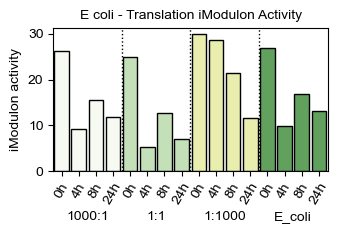

In [19]:
plot_im_activity('Translation', organism='E_coli', fig_size=(3.5, 2.2), show_replicates=False, save_path='Translation_e_coli_activity_comparison.svg')

<Axes: title={'center': 'E coli - RpoS iModulon Activity'}, ylabel='iModulon activity'>

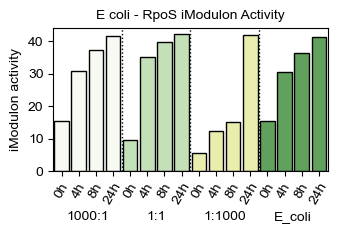

In [20]:
plot_im_activity('RpoS', organism='E_coli', fig_size=(3.5, 2.2), show_replicates=False, save_path='RpoS_e_coli_activity_comparison.svg')

<Axes: title={'center': 'E coli - Arginine iModulon Activity'}, ylabel='iModulon activity'>

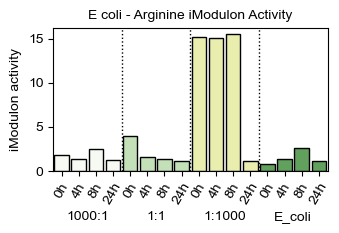

In [21]:
plot_im_activity('Arginine', organism='E_coli', fig_size=(3.5, 2.2), show_replicates=False, save_path='Arginine_e_coli_activity_comparison.svg')

<Axes: title={'center': 'E coli - CpxR iModulon Activity'}, ylabel='iModulon activity'>

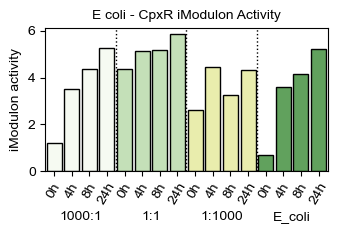

In [22]:
plot_im_activity('CpxR', organism='E_coli', fig_size=(3.5, 2.2), show_replicates=False, save_path='CpxR_e_coli_activity_comparison.svg')

<Axes: title={'center': 'E coli - Crp-1 iModulon Activity'}, ylabel='iModulon activity'>

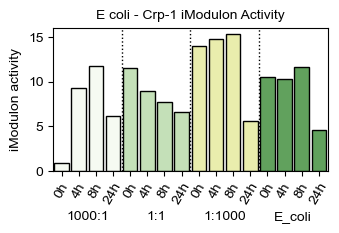

In [23]:
plot_im_activity('Crp-1', organism='E_coli', fig_size=(3.5, 2.2), show_replicates=False, save_path='Crp_1_e_coli_activity_comparison.svg')

<Axes: title={'center': 'E coli - ppGpp iModulon Activity'}, ylabel='iModulon activity'>

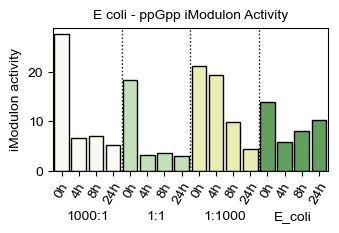

In [24]:
plot_im_activity('ppGpp', organism='E_coli', fig_size=(3.5, 2.2), show_replicates=False)

<Axes: title={'center': 'E coli - ArcA iModulon Activity'}, ylabel='iModulon activity'>

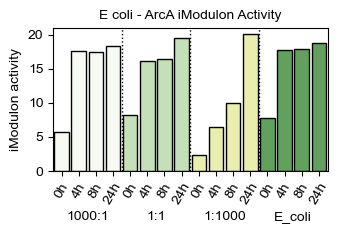

In [25]:
plot_im_activity('ArcA', organism='E_coli', fig_size=(3.5, 2.2), show_replicates=False)

<Axes: title={'center': 'E coli - Fnr-1 iModulon Activity'}, ylabel='iModulon activity'>

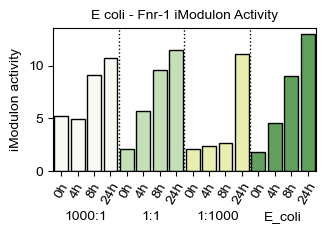

In [26]:
plot_im_activity('Fnr-1', organism='E_coli', fig_size=(3.5, 2.2), show_replicates=False)

<Axes: title={'center': 'E coli - Fnr-2 iModulon Activity'}, ylabel='iModulon activity'>

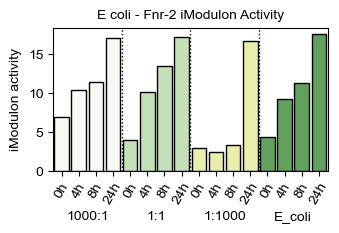

In [27]:
plot_im_activity('Fnr-2', organism='E_coli', fig_size=(3.5, 2.2), show_replicates=False)

## P putida

In [28]:
SECTION_COLORS = {
    '1000:1': '#F2F7FA',
    '1:1': '#B8D3E0',
    '1:1000': '#D5C4E0',
    'E_coli': '#4989BD',
    'P_putida': '#4989BD',
}

<Axes: title={'center': 'P putida - Translation iModulon Activity'}, ylabel='iModulon activity'>

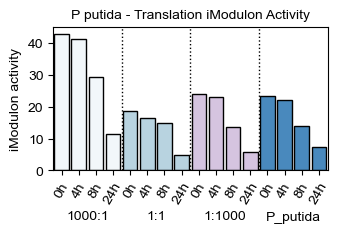

In [29]:
plot_im_activity('Translation', organism='P_putida', fig_size=(3.5, 2.2), show_replicates=False, save_path='Translation_p_putida_activity_comparison.svg')

In [30]:
pputida_A = Basal_iM_Activity_by_direction(pputida_A, 'PvdS', -1)

<Axes: title={'center': 'P putida - PvdS iModulon Activity'}, ylabel='iModulon activity'>

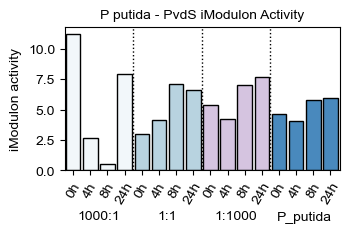

In [31]:
plot_im_activity('PvdS', organism='P_putida', fig_size=(3.5, 2.2), show_replicates=False, save_path='PvdS_p_putida_activity_comparison.svg')

In [32]:
pputida_A = Basal_iM_Activity_by_direction(pputida_A, 'PydR/RpoS', -1)

<Axes: title={'center': 'P putida - PydR/RpoS iModulon Activity'}, ylabel='iModulon activity'>

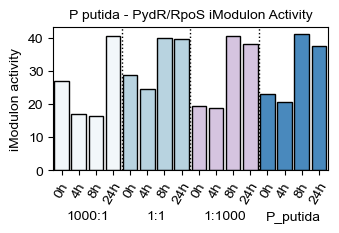

In [33]:
plot_im_activity('PydR/RpoS', organism='P_putida', fig_size=(3.5, 2.2), show_replicates=False)

In [34]:
pputida_A = Basal_iM_Activity_by_direction(pputida_A, 'Acetate', -1)

<Axes: title={'center': 'P putida - Acetate iModulon Activity'}, ylabel='iModulon activity'>

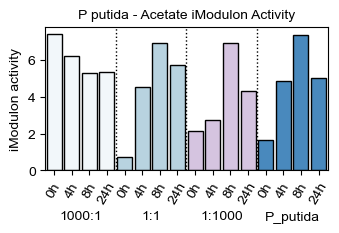

In [38]:
plot_im_activity('Acetate', organism='P_putida', fig_size=(3.5, 2.2), show_replicates=False, save_path='Acetate_p_putida_activity_comparison.svg')

<Axes: title={'center': 'P putida - BkdR iModulon Activity'}, ylabel='iModulon activity'>

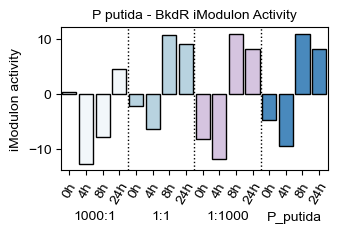

In [34]:
plot_im_activity('BkdR', organism='P_putida', fig_size=(3.5, 2.2), show_replicates=False)

<Axes: title={'center': 'P putida - GbdR iModulon Activity'}, ylabel='iModulon activity'>

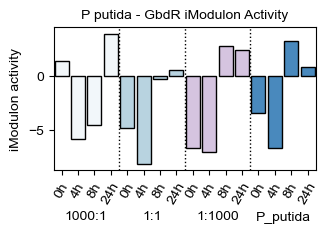

In [35]:
plot_im_activity('GbdR', organism='P_putida', fig_size=(3.5, 2.2), show_replicates=False)

<Axes: title={'center': 'P putida - Osmotic stress-1 iModulon Activity'}, ylabel='iModulon activity'>

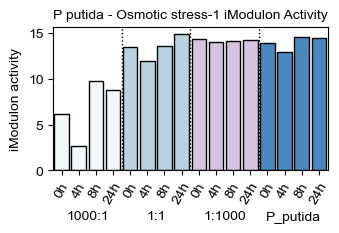

In [36]:
plot_im_activity('Osmotic stress-1', organism='P_putida', fig_size=(3.5, 2.2), show_replicates=False)

<Axes: title={'center': 'P putida - Acetate stress iModulon Activity'}, ylabel='iModulon activity'>

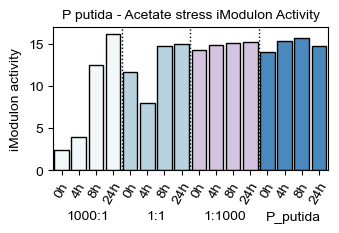

In [36]:
plot_im_activity('Acetate stress', organism='P_putida', fig_size=(3.5, 2.2), show_replicates=False, save_path='Acetate_stress_p_putida_activity_comparison.svg')

In [38]:
pputida_A = Basal_iM_Activity_by_direction(pputida_A, 'T6SS', +1)

<Axes: title={'center': 'P putida - T6SS iModulon Activity'}, ylabel='iModulon activity'>

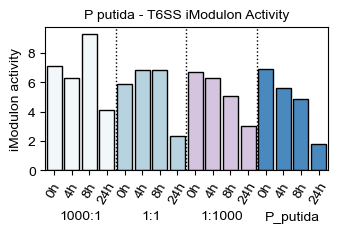

In [41]:
plot_im_activity('T6SS', organism='P_putida', fig_size=(3.5, 2.2), show_replicates=False, save_path='T6SS_p_putida_activity_comparison.svg')